In [1]:
import numpy as np
import math

def rrstr(x,n): # округление до n знаков после запятой
    fmt = '{:.'+str(n)+'f}'
    return fmt.format(x).replace('.',',')

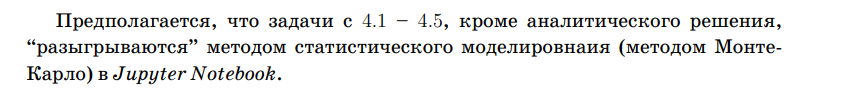

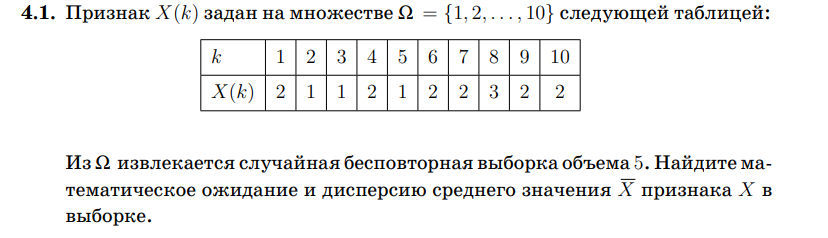

In [2]:
k = 10
v = 5
X_k = [2, 1, 1, 2, 1, 2, 2, 3, 2, 2]

E_X = np.mean(X_k)
print('Мат ожидание среднего значения', rrstr(E_X,2))
VarX = (np.var(X_k))/v*(k-v)/(k-1)
print('Дисперсия среднего значения ', rrstr(VarX, 2))

Мат ожидание среднего значения 1,80
Дисперсия среднего значения  0,04


Формула для дисперсии выборочного среднего $Var (\bar{X})$ обычно выглядит так: 
$ Var(\bar{X}) = \frac{Var}{v} \cdot \frac{N-v}{N-1} $

Но в этом случае выглядит так:
$ Var(\bar{X}) = \frac{Var}{v} \cdot \frac{k-v}{k-1} $


In [3]:
k, v, X_k = 10, 5, np.array([2, 1, 1, 2, 1, 2, 2, 3, 2, 2])
samples = np.random.choice(X_k, (10000, v), replace=True)
monte_carlo_mean = np.mean(samples, axis=1).mean()
monte_carlo_var = np.var(samples, axis=1).mean() / v * (k - v) / (k - 1)

print('Мат ожидание среднего значения (Монте-Карло):', rrstr(monte_carlo_mean, 2))
print('Дисперсия среднего значения (Монте-Карло):', rrstr(monte_carlo_var, 2))


Мат ожидание среднего значения (Монте-Карло): 1,80
Дисперсия среднего значения (Монте-Карло): 0,03


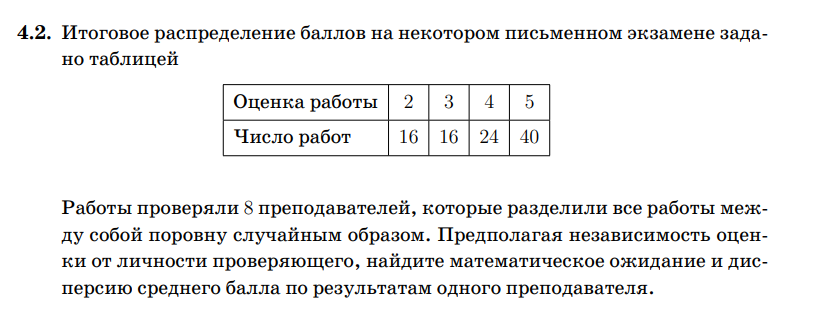

In [4]:
ocenka_rab = np.array([2, 3, 4, 5])  # Строка оценка работы
count = np.array([16, 16, 24, 40])  # Число работ

N = np.sum(count)  # Рассчитываем общее число работ
p = 8  # Количество преподавателей
n = N // p  # Среднее количество работ на 1 преподавателя

# Математическое ожидание
E_X = np.sum(count * ocenka_rab) / N  # формула ниже 6 markdown
print('Mат ожидание среднего балла:', rrstr(E_X, 3))

# Дисперсия
VarX = np.sum(count * ocenka_rab**2) / N - E_X**2
Var_X = VarX / n * (N - n) / (N - 1)
print('Дисперсия среднего балла:', rrstr(Var_X, 3))

# Метод Монте-Карло
np.random.seed(42)  # Зафиксируем seed для воспроизводимости результатов
random_samples = np.random.choice(ocenka_rab, size=N, p=count/N)#Количество работ и p = вероятность lkz каждой оценки работы. 
monte_carlo_mean = np.mean(random_samples)
monte_carlo_variance = np.var(random_samples, ddof=1)

print('Mат ожидание (Монте-Карло):', rrstr(monte_carlo_mean, 3))
print('Дисперсия (Монте-Карло):', rrstr(monte_carlo_variance, 3))


Mат ожидание среднего балла: 3,917
Дисперсия среднего балла: 0,092
Mат ожидание (Монте-Карло): 3,812
Дисперсия (Монте-Карло): 1,396


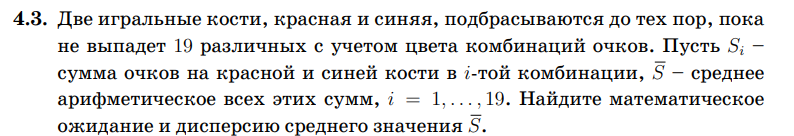

In [5]:
E_X = (6+1)/2
Var_X = (6**2-1)/12
E_Y = E_X; Var_Y = Var_X
E_S_mean = E_X + E_Y
print('Мат ожидание среднего S ', E_S_mean)
n = 19
N = 36
Var_S_mean = Var_X*2/n*(N-n)/(N-1)
print('Дисперсия среднего S ', Var_S_mean)

Мат ожидание среднего S  7.0
Дисперсия среднего S  0.14912280701754385


In [6]:
EX = (6 + 1) / 2 #Вычисление матожидания для 1 кости со средним арифмитическим в диапазоне от а до б, где а=1,б=6
VarX = (6**2 - 1) / 12#Var(X) = (b - a)^2 / 12,

# Задаем параметры
n = 19#количество сумм
N = 36#все комбинации

# Вычисление EY и VarY(две кости)
EY = EX
VarY = VarX

# Вычисление математического ожидания среднего значения S(сумма)
ES_mean = EX + EY
print('Мат ожидание среднего S:', ES_mean)

# Вычисление дисперсии среднего значения S
VarS_mean = VarX * 2 / n * (N - n) / (N - 1)
print('Дисперсия среднего S:', VarS_mean)

# Метод Монте-Карло
np.random.seed(42)
random_samples = np.random.randint(1, 7, size=(n, 2))
sums = np.sum(random_samples, axis=1)
mean_S_MC = np.mean(sums)
print('Мат ожидание среднего S (Монте-Карло):', rrstr(mean_S_MC, 3))

# Метод Монте-Карло для дисперсии
var_samples = np.var(sums, ddof=1)
VarS_mean_MC = 2 * VarX / n * (N - n) / (N - 1)
print('Дисперсия среднего S (Монте-Карло):', rrstr(var_samples, 3))


Мат ожидание среднего S: 7.0
Дисперсия среднего S: 0.14912280701754385
Мат ожидание среднего S (Монте-Карло): 7,684
Дисперсия среднего S (Монте-Карло): 5,895


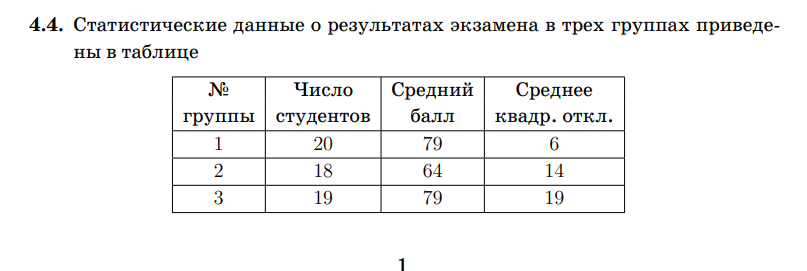

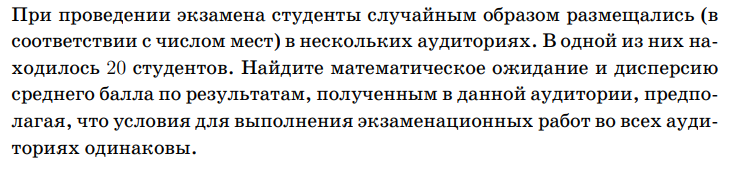

In [7]:
chislo_studentov = [20, 18, 19]
sredniy_ball = [79, 64, 79]
sr_kv_otklonenie = [6, 14, 19]

# Размер аудитории
sample_size = 20

# Вычисление математического ожидания и дисперсии для каждой группы
means = np.array(sredniy_ball)
variances = np.array(sr_kv_otklonenie)**2 / sample_size

for i in range(len(chislo_studentov)):
    print(f"Группа {i+1}:")
    print(f"Математическое ожидание (среднее): {means[i]}")
    print(f"Дисперсия: {variances[i]}\n")

# Суммируем математические ожидания и дисперсии по группам, учитывая размер аудитории
overall_mean = np.sum(means * chislo_studentov) / np.sum(chislo_studentov)
overall_variance = np.sum(variances * chislo_studentov) / np.sum(chislo_studentov)

print("Общие результаты:")
print(f"Общее математическое ожидание (среднее): {overall_mean}")
print(f"Общая дисперсия: {overall_variance}")



Группа 1:
Математическое ожидание (среднее): 79
Дисперсия: 1.8

Группа 2:
Математическое ожидание (среднее): 64
Дисперсия: 9.8

Группа 3:
Математическое ожидание (среднее): 79
Дисперсия: 18.05

Общие результаты:
Общее математическое ожидание (среднее): 74.26315789473684
Общая дисперсия: 9.742982456140352


In [8]:
chislo_studentov = [20, 18, 19]
sredniy_ball = [79, 64, 79]
sr_kv_otklonenie = [6, 14, 19]

# Размер аудитории
sample_size = 20

# Вычисление математического ожидания и дисперсии для каждой группы
means = np.array(sredniy_ball)
variances = np.array(sr_kv_otklonenie)**2 / sample_size

# Суммируем математические ожидания и дисперсии по группам, учитывая размер аудитории
overall_mean = np.sum(means * chislo_studentov) / np.sum(chislo_studentov)
overall_variance = np.sum(variances * chislo_studentov) / np.sum(chislo_studentov)

print(f"Математическое ожидание (среднее): {np.mean(overall_mean)}")
print(f"Дисперсия: {np.mean(overall_variance)}")


Математическое ожидание (среднее): 74.26315789473684
Дисперсия: 9.742982456140352


In [9]:
chislo_studentov = [20, 18, 19]
sredniy_ball = [79, 64, 79]
sr_kv_otklonenie = [6, 14, 19]

# Размер аудитории
sample_size = 20

# Вычисление математического ожидания и дисперсии для каждой группы
means = np.array(sredniy_ball)
variances = np.array(sr_kv_otklonenie)**2 / sample_size

# Суммируем математические ожидания и дисперсии по группам, учитывая размер аудитории
overall_mean = np.sum(means * chislo_studentov) / np.sum(chislo_studentov)
overall_variance = np.sum(variances * chislo_studentov) / np.sum(chislo_studentov)

print(f"Математическое ожидание (среднее): {overall_mean}")
print(f"Дисперсия: {overall_variance}")

# Метод Монте-Карло для генерации случайных выборок и оценки среднего
num_simulations = 10000
simulated_scores = np.random.normal(overall_mean, np.sqrt(overall_variance), size=(num_simulations, sample_size))

# Расчет средних для каждой симуляции
simulated_means = np.mean(simulated_scores, axis=1)


print("\nРезультаты метода Монте-Карло:")
print(f"Математическое ожидание {np.mean(simulated_means)}")
print(f"Дисперсия по симуляциям: {np.var(simulated_means)}")


Математическое ожидание (среднее): 74.26315789473684
Дисперсия: 9.742982456140352

Результаты метода Монте-Карло:
Математическое ожидание 74.27313731577576
Дисперсия по симуляциям: 0.4721642308565906


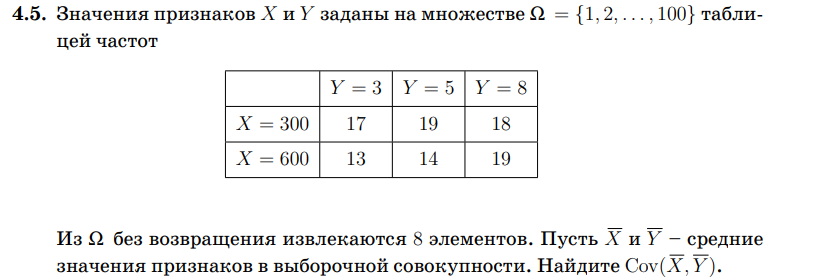

In [10]:
x = [300, 600]
nx = [54, 46]
y = [3, 5, 8]
ny = [30, 33, 37]

# Вычисление средних значений
ex = sum(xi * ni for xi, ni in zip(x, nx)) / sum(nx)
ey = sum(yi * ni for yi, ni in zip(y, ny)) / sum(ny)

# Вычисление ковариации
xy = [900, 1500, 2400, 1800, 3000, 4800]
nxy = [17, 19, 18, 13, 14, 19]
exy = sum(xi * ni for xi, ni in zip(xy, nxy)) / sum(nxy)

cov = exy - ex * ey
cov_mean = 1 / n * cov * (N - n) / (N - 1)

print('Cov(x_mean, y_mean) = ', cov_mean)


Cov(x_mean, y_mean) =  0.5782556390977416


In [11]:
x = [300, 600]
nx = [54, 46]
y = [3, 5, 8]
ny = [30, 33, 37]

# Вычисление средних значений
ex = sum(xi * ni for xi, ni in zip(x, nx)) / sum(nx)
ey = sum(yi * ni for yi, ni in zip(y, ny)) / sum(ny)

# Вычисление ковариации
xy = [900, 1500, 2400, 1800, 3000, 4800]
nxy = [17, 19, 18, 13, 14, 19]
exy = sum(xi * ni for xi, ni in zip(xy, nxy)) / sum(nxy)

cov = exy - ex * ey
cov_mean = 1 / len(x) * cov * (np.sum(nx) - len(x)) / (np.sum(nx) - 1)

# Метод Монте-Карло
num_simulations = 100000  # Количество симуляций

# Генерация случайных выборок
x_samples = np.random.choice(x, size=num_simulations, p=np.array(nx) / np.sum(nx))
y_samples = np.random.choice(y, size=num_simulations, p=np.array(ny) / np.sum(ny))

# Вычисление средних значений для каждой симуляции
ex_simulated = np.mean(x_samples)
ey_simulated = np.mean(y_samples)

# Вычисление ковариации для каждой симуляции
cov_simulated = np.mean((x_samples - ex_simulated) * (y_samples - ey_simulated))

print('Результаты метода Монте-Карло:')
print(f'Среднее значение X: {ex_simulated}')
print(f'Среднее значение Y: {ey_simulated}')
print(f'Ковариация: {cov_simulated}')

print('Cov(x_mean, y_mean) = ', cov_mean)


Результаты метода Монте-Карло:
Среднее значение X: 437.907
Среднее значение Y: 5.51043
Ковариация: -0.14987001000000702
Cov(x_mean, y_mean) =  11.195757575757522


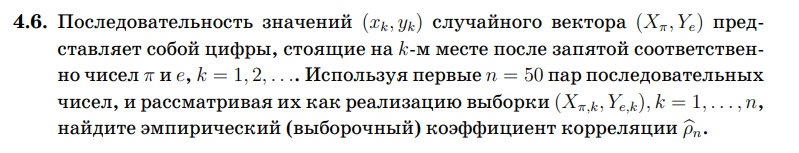

In [12]:
# Первые n=50 пар последовательных чисел после запятой в π и e
n = 50
pi_digits = str(math.pi)[2:2+n]
e_digits = str(math.e)[2:2+n]

# Преобразование строк в списки чисел
X_pi = [int(digit) for digit in pi_digits]
Y_e = [int(digit) for digit in e_digits]

# Вычисление средних значений
mean_X = sum(X_pi) / n
mean_Y = sum(Y_e) / n

# Вычисление эмпирического коэффициента корреляции
numerator = sum((X - mean_X) * (Y - mean_Y) for X, Y in zip(X_pi, Y_e))
denominator_X = math.sqrt(sum((X - mean_X)**2 for X in X_pi))
denominator_Y = math.sqrt(sum((Y - mean_Y)**2 for Y in Y_e))

rho_bn = numerator / (denominator_X * denominator_Y)

print('Эмпирический коэффициент корреляции (rho_bn):', rho_bn)


Эмпирический коэффициент корреляции (rho_bn): 0.6209502098181604


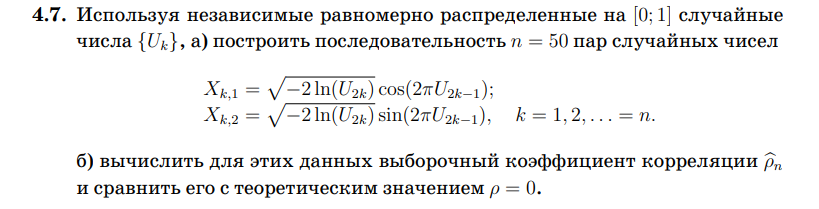

In [13]:
# Число пар случайных чисел
n = 50

# Генерация независимых равномерно распределенных случайных чисел на [0; 1]
U = np.random.rand(2 * n)

# Инициализация массивов для X1 и X2
X1 = np.zeros(n)
X2 = np.zeros(n)

# Построение последовательности n = 50 пар случайных чисел
for k in range(n):
    X1[k] = math.sqrt(-2 * math.log(U[2*k])) * math.cos(2 * math.pi * U[2*k - 1])
    X2[k] = math.sqrt(-2 * math.log(U[2*k])) * math.sin(2 * math.pi * U[2*k - 1])

# Вычисление выборочного коэффициента корреляции
rho_bn = np.corrcoef(X1, X2)[0, 1]

print('Выборочный коэффициент корреляции (rho_bn):', rho_bn)


Выборочный коэффициент корреляции (rho_bn): -0.015988485823969476


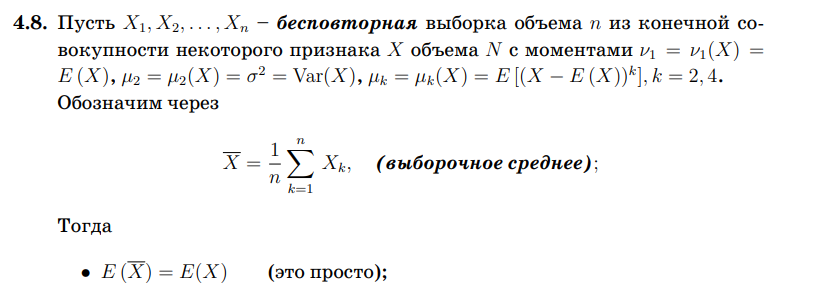

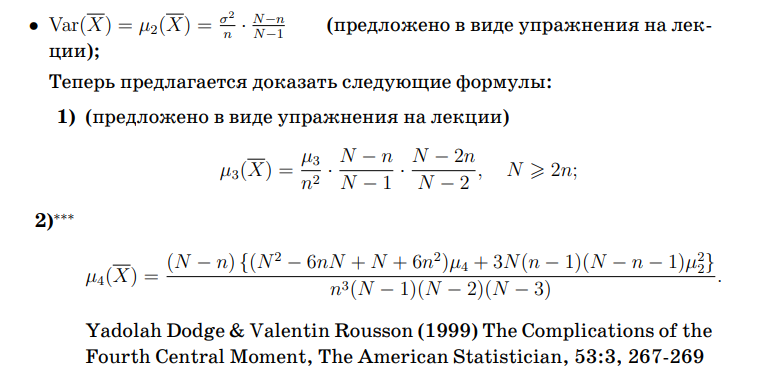

In [14]:
N = 100 
n = 30   
mu_3 = 5
mu_4 = 10
mu_2 = 3

mu_3_X = mu_3 / n**2 * (N - n) / (N - 1) * (N - 2*n) / (N - 2)

mu_4_X = (N - n) * (N**2 - 6*n*N + N + 6*n**2) / (n**3 * (N - 1) * (N - 2) * (N - 3)) * mu_4 + 3*N*(n - 1)*(N - n - 1) * mu_2**2

print(f"Результаты расчетов:")
print(f"mu_3(X): {mu_3_X}")
print(f"mu_4(X): {mu_4_X}")


Результаты расчетов:
mu_3(X): 0.0016033349366682702
mu_4(X): 5402699.999931128


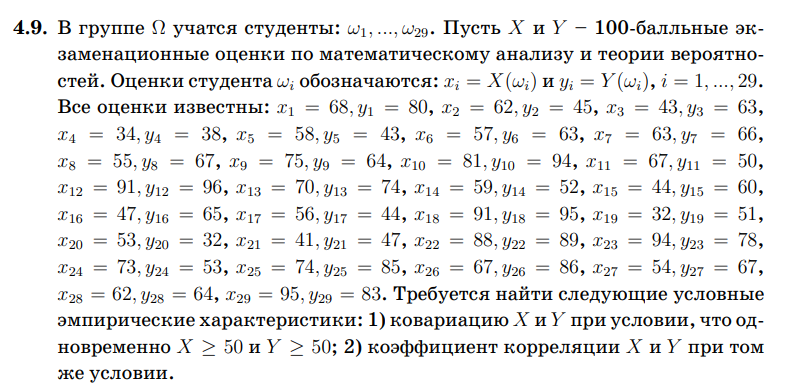

In [15]:
#пример из листочка, в конце
xy='x1 = 95, y1 = 83, x2 = 86, y2 = 77, x3 = 56, y3 = 42, x4 = 46, y4 = 57, x5 =\
68, y5 = 70, x6 = 70, y6 = 75, x7 = 33, y7 = 48, x8 = 89, y8 = 81, x9 = 82, y9 = 74,\
x10 = 81, y10 = 80, x11 = 52, y11 = 62, x12 = 80, y12 = 78, x13 = 55, y13 = 68, x14 =\
73, y14 = 64, x15 = 67, y15 = 56, x16 = 90, y16 = 80, x17 = 92, y17 = 97, x18 = 43, y18 =\
42, x19 = 66, y19 = 74, x20 = 37, y20 = 37, x21 = 59, y21 = 59, x22 = 83, y22 = 99,\
x23 = 84, y23 = 95, x24 = 43, y24 = 48, x25 = 32, y25 = 37, x26 = 44, y26 = 41\
'
xy

'x1 = 95, y1 = 83, x2 = 86, y2 = 77, x3 = 56, y3 = 42, x4 = 46, y4 = 57, x5 =68, y5 = 70, x6 = 70, y6 = 75, x7 = 33, y7 = 48, x8 = 89, y8 = 81, x9 = 82, y9 = 74,x10 = 81, y10 = 80, x11 = 52, y11 = 62, x12 = 80, y12 = 78, x13 = 55, y13 = 68, x14 =73, y14 = 64, x15 = 67, y15 = 56, x16 = 90, y16 = 80, x17 = 92, y17 = 97, x18 = 43, y18 =42, x19 = 66, y19 = 74, x20 = 37, y20 = 37, x21 = 59, y21 = 59, x22 = 83, y22 = 99,x23 = 84, y23 = 95, x24 = 43, y24 = 48, x25 = 32, y25 = 37, x26 = 44, y26 = 41'

In [16]:
sample=np.array(list(map(lambda x: (int(x[0].split('=')[1]), int(x[1].split('=')[1])),\
list(map(lambda x: x.split(','), xy.split('x')))[1:])))
sample

array([[95, 83],
       [86, 77],
       [56, 42],
       [46, 57],
       [68, 70],
       [70, 75],
       [33, 48],
       [89, 81],
       [82, 74],
       [81, 80],
       [52, 62],
       [80, 78],
       [55, 68],
       [73, 64],
       [67, 56],
       [90, 80],
       [92, 97],
       [43, 42],
       [66, 74],
       [37, 37],
       [59, 59],
       [83, 99],
       [84, 95],
       [43, 48],
       [32, 37],
       [44, 41]])

In [17]:
mask = sample >= 70
sample[mask[:, 0] & mask[:, 1]]

array([[95, 83],
       [86, 77],
       [70, 75],
       [89, 81],
       [82, 74],
       [81, 80],
       [80, 78],
       [90, 80],
       [92, 97],
       [83, 99],
       [84, 95]])

In [18]:
x,y =sample[mask[:, 0] & mask[:, 1]].T
x,y

(array([95, 86, 70, 89, 82, 81, 80, 90, 92, 83, 84]),
 array([83, 77, 75, 81, 74, 80, 78, 80, 97, 99, 95]))

In [19]:
 np.cov(x,y,ddof=1)[0][1]

21.063636363636366

In [20]:
np.cov(x,y,bias=True)[0][1]


19.148760330578515

In [21]:
np.cov(x,y,ddof=0)[0][1]

19.148760330578515

In [22]:
np.cov(x,y)[0][1]

21.063636363636366

In [23]:
 np.corrcoef(x,y)[0][1]

0.33907908338652526

In [24]:
xy = 'x1 = 95, y1 = 83, x2 = 86, y2 = 77, x3 = 56, y3 = 42, x4 = 46, y4 = 57, x5 =\
68, y5 = 70, x6 = 70, y6 = 75, x7 = 33, y7 = 48, x8 = 89, y8 = 81, x9 = 82, y9 = 74,\
x10 = 81, y10 = 80, x11 = 52, y11 = 62, x12 = 80, y12 = 78, x13 = 55, y13 = 68, x14 =\
73, y14 = 64, x15 = 67, y15 = 56, x16 = 90, y16 = 80, x17 = 92, y17 = 97, x18 = 43, y18 =\
42, x19 = 66, y19 = 74, x20 = 37, y20 = 37, x21 = 59, y21 = 59, x22 = 83, y22 = 99,\
x23 = 84, y23 = 95, x24 = 43, y24 = 48, x25 = 32, y25 = 37, x26 = 44, y26 = 41\
'
sample = np.array(list(map(lambda x: (int(x[0].split('=')[1]), int(x[1].split('=')[1])),\
                         list(map(lambda x: x.split(','), xy.split('x')))[1:])))

mask = sample >= 70
sample[mask[:, 0] & mask[:, 1]]
x,y  = sample[mask[:, 0] & mask[:, 1]].T

np.cov(x,y,ddof=1)[0][1]
np.cov(x,y,bias=True)[0][1]
np.cov(x,y,ddof=0)[0][1]
np.cov(x,y)[0][1]
np.corrcoef(x,y)[0][1]

0.33907908338652526

In [27]:
#Наша задача
xy = 'x1 = 68, y1 = 80, x2 = 62, y2 = 45, x3 = 43, y3 = 63, x4 = 34, y4 = 38, x5 = 58, y5 = 43,\
x6 = 57, y6 = 63, x7 = 63, y7 = 66, x8 = 55, y8 = 67, x9 = 75, y9 = 64, x10 = 81, y10 = 94,\
x11 = 67, y11 = 50, x12 = 91, y12 = 96, x13 = 70, y13 = 74, x14 = 59, y14 = 52, x15 = 44, y15 = 60,\
x16 = 47, y16 = 65, x17 = 56, y17 = 44, x18 = 91, y18 = 95, x19 = 32, y19 = 51, x20 = 53, y20 = 32,\
x21 = 41, y21 = 47, x22 = 88, y22 = 89, x23 = 94, y23 = 78, x24 = 73, y24 = 53, x25 = 74, y25 = 85,\
x26 = 67, y26 = 86, x27 = 54, y27 = 67, x28 = 62, y28 = 64, x29 = 95, y29 = 83'

sample = np.array(list(map(lambda x: (int(x[0].split('=')[1]), int(x[1].split('=')[1])), \
                list(map(lambda x: x.split(','), xy.split('x')))[1:])))

mask = sample >= 50
x, y = sample[mask[:, 0] & mask[:, 1]].T

cov = np.cov(x, y, ddof=1)[0][1]
corr = np.corrcoef(x, y)[0][1]

print("Ковариация при условии X >= 50 и Y >= 50:", cov)
print("Коэффициент корреляции при условии X >= 50 и Y >= 50:", corr)


Ковариация при условии X >= 50 и Y >= 50: 133.72222222222223
Коэффициент корреляции при условии X >= 50 и Y >= 50: 0.6651397470340329


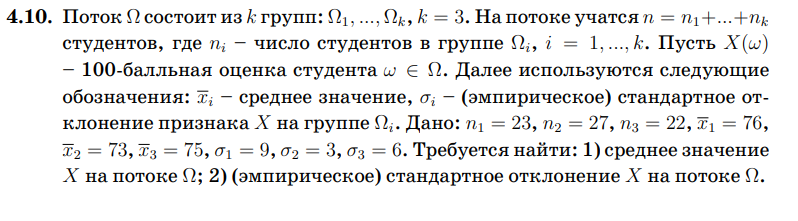

In [26]:
n = np.array([23, 27, 22])#Массив студентов трех групп
x = np.array([76, 73, 75])#Массив средних оценок студентов трех групп
a = np.array([9, 3, 6])#Массив стандратных отклонений студентов трех групп

r = np.sum(x * n) / np.sum(n)# Средневзвешенное значение оценок

s_all = np.sqrt(np.sum(a**2 + x**2 * n) / np.sum(n) - r**2)# Эмпирическое стандартное отклонение

print(f'Ср знач {rrstr(r, 3)}, ст отклон {rrstr(s_all, 5)}')


Ср знач 74,569, ст отклон 1,83958
